In [322]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [323]:
dataset = fetch_california_housing()

In [324]:
x = dataset.data
y = dataset.target
classes = dataset.target_names
features = dataset.feature_names
description = dataset.DESCR

In [325]:
df = pd.DataFrame(x, columns=features)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [326]:
class SimpleLinearRegression:
    def __init__(self) -> None:
        self.coef_: float = None
        self.intercept_: float = None
        
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        self._compute_coef(x, y)
        self._compute_intercept(x, y)
    
    def predict(self, x: np.ndarray) -> np.ndarray:
        predictions = self.coef_*x+self.intercept_
        return predictions
    
    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred)**2)
        denominator = np.sum((y - y_mean)**2)
        return 1 - (numerator/denominator)
    
    def _compute_coef(self, x: np.ndarray, y: np.ndarray) -> None:
        meanX = np.mean(x, axis=0)
        meanY = np.mean(y, axis=0)
        numerator: float = 0
        for i in range(0, len(x)):
            numerator += (x[i]-meanX)*(y[i]-meanY)
        denominator: float = 0
        for i in range(0, len(x)):
            denominator += (x[i]-meanX)**2
        self.coef_ = numerator/denominator
    
    def _compute_intercept(self, x: np.ndarray, y: np.ndarray) -> None:
        meanX = np.mean(x, axis=0)
        meanY = np.mean(y, axis=0)
        self.intercept_ = meanY - self.coef_*meanX        

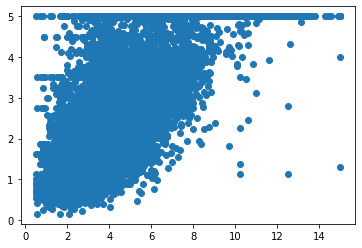

In [327]:
filtered = x[:, 0]

# splits the dataset into a training (70%) and into a testing set (30%) randomly
x_train, x_test, y_train, y_test = train_test_split(filtered, y, test_size=0.3)
plt.scatter(x_train, y_train)
plt.show()

In [328]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
sc_own = regr.score(x_test, y_test)
test_preds = regr.predict(x_test)
sc_sklearn = r2_score(y_test, test_preds)

print(f"score (own): {sc_own*100:.4}%")
print(f"score (sklearn): {sc_sklearn*100:.4}%")
print(f"coef: {regr.coef_}")
print(f"intercept: {regr.intercept_}")

score (own): 47.29%
score (sklearn): 47.29%
coef: 0.4181932697598387
intercept: 0.447949655560429


In [329]:
print(f"preds: {test_preds}")
print(f"expect: {y_test}")

preds: [1.15101618 1.50652228 1.90330405 ... 1.91664442 1.97435509 1.72427551]
expect: [0.477   0.458   5.00001 ... 2.184   1.194   2.098  ]


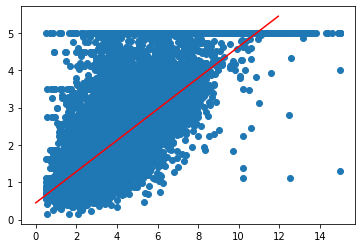

In [330]:
x_axis = np.arange(start=0, stop=12, step=0.05)
y_preds = regr.predict(x_axis)

plt.scatter(x_train, y_train)
plt.plot(x_axis, y_preds, color="red")
plt.show()